<a href="https://colab.research.google.com/github/ZulKM/Task-Colledge/blob/main/PrediksiHargaMobil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library yang dibutuhkan 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

numpy untuk mempermudahkan operasi komputasi yang bersifat numerik (angka)
matlitlib berguna untuk memvisualisasikan data


In [ ]:
data = pd.read_csv("imports-85.data")


In [ ]:
data.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


pada tabel diatas terdapat 4 baris x 26 kolom kemungkinan besar file ini merupakan file dengan format CSV yang tanpa nama kolom.

In [ ]:
cols = ['Simbol', 'Kerugian', 'Jenis-mobil', 'Tipe-bahan-bakar', 'Aspirasi', 'Jumlah-pintu', 'Jenis-body', 
        'jenis-kendaraan', 'Letak-mesin', 'jenis-roda', 'Panjang-kendaraan', 'Lebar-kendaraan', 'Tinggi-kendaraan', 'Kapasitas', 'Jenis-mesin', 
        'Nomor-mesin', 'ukuran-mesin', 'sistem-kendaraan', 'bore', 'stroke-mesin', 'tingkat-kompresi', 'horsepower',
        'kecepatan-putaran-mesin', 'Rata-rata-kecepatan-pada-kota', 'Rata-rata-kecepatan-pada-jalan-raya', 'Harga']
data = pd.read_csv("imports-85.data", names=cols)        

In [ ]:
data.head()

,Simbol,Kerugian,Jenis-mobil,Tipe-bahan-bakar,Aspirasi,Jumlah-pintu,Jenis-body,jenis-kendaraan,Letak-mesin,jenis-roda,Panjang-kendaraan,Lebar-kendaraan,Tinggi-kendaraan,Kapasitas,Jenis-mesin,Nomor-mesin,ukuran-mesin,sistem-kendaraan,bore,stroke-mesin,tingkat-kompresi,horsepower,kecepatan-putaran-mesin,Rata-rata-kecepatan-pada-kota,Rata-rata-kecepatan-pada-jalan-raya,Harga
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
continuous_values_cols = ['Kerugian', 'jenis-roda', 'Panjang-kendaraan', 'Lebar-kendaraan', 'Tinggi-kendaraan',
                          'Kapasitas', 'bore', 'stroke-mesin', 'tingkat-kompresi', 'horsepower',
                          'kecepatan-putaran-mesin', 'Rata-rata-kecepatan-pada-kota', 'Rata-rata-kecepatan-pada-jalan-raya', 'Harga']

data = data[continuous_values_cols]
data.head()

,Kerugian,jenis-roda,Panjang-kendaraan,Lebar-kendaraan,Tinggi-kendaraan,Kapasitas,bore,stroke-mesin,tingkat-kompresi,horsepower,kecepatan-putaran-mesin,Rata-rata-kecepatan-pada-kota,Rata-rata-kecepatan-pada-jalan-raya,Harga
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


pada tabel diatas berisikan tabel pilihan untuk menentukan apakah harga mobil dipengaruhi oleh tabel diatas yang berisikan jenis kerugian, jenis roda, panjang kendaraannya,lebar,tinggi,dsb

selanjutnya dilakukan dengan proses selanjutnya yaitu pembersihan data. yang tidak memiliki atribut dengan menambahkan tulisan NAN

In [ ]:
data = data.replace('?', np.nan)
data.head()

,Kerugian,jenis-roda,Panjang-kendaraan,Lebar-kendaraan,Tinggi-kendaraan,Kapasitas,bore,stroke-mesin,tingkat-kompresi,horsepower,kecepatan-putaran-mesin,Rata-rata-kecepatan-pada-kota,Rata-rata-kecepatan-pada-jalan-raya,Harga
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


kenapa diberikan pada kode berupa tanda tanya (?) karena pada tabel tersebut dan tanda tanya merupakan sebuah tipe string. 
pada tabel terdapat value kosong. untuk meminimalisir eror diperlukan proses data cleaning.


In [ ]:
data = data.astype('float')
data.isnull().sum()

Kerugian                               41
jenis-roda                              0
Panjang-kendaraan                       0
Lebar-kendaraan                         0
Tinggi-kendaraan                        0
Kapasitas                               0
bore                                    4
stroke-mesin                            4
tingkat-kompresi                        0
horsepower                              2
kecepatan-putaran-mesin                 2
Rata-rata-kecepatan-pada-kota           0
Rata-rata-kecepatan-pada-jalan-raya     0
Harga                                   4
dtype: int64

pada proses ini untuk mengetahui pada colom mana yang terdapat atribut yang kosong. sehingga kita dapat melakukan proses pembersihan data tersebut.

dan pada tahap selanjutnya kita akan melakukan pembersihan atribut kosong pada kolom ["Harga"] dikarenakan pada kolom ini kita ingin untuk diprediksi.

In [ ]:
data = data.dropna(subset=['Harga'])
data.isnull().sum()

Kerugian                               37
jenis-roda                              0
Panjang-kendaraan                       0
Lebar-kendaraan                         0
Tinggi-kendaraan                        0
Kapasitas                               0
bore                                    4
stroke-mesin                            4
tingkat-kompresi                        0
horsepower                              2
kecepatan-putaran-mesin                 2
Rata-rata-kecepatan-pada-kota           0
Rata-rata-kecepatan-pada-jalan-raya     0
Harga                                   0
dtype: int64

pada tahap selanjutnya dilakukan proses pembersihan yang tersisa. dilakukan pembersihan dengan menggunakan fitur bawaan google colab.

In [ ]:
data = data.fillna(data.mean())

lalu selanjutnya apakah tabel tersebut sudah bersih dari value kosong.

In [ ]:
data.isnull().sum()

Kerugian                               0
jenis-roda                             0
Panjang-kendaraan                      0
Lebar-kendaraan                        0
Tinggi-kendaraan                       0
Kapasitas                              0
bore                                   0
stroke-mesin                           0
tingkat-kompresi                       0
horsepower                             0
kecepatan-putaran-mesin                0
Rata-rata-kecepatan-pada-kota          0
Rata-rata-kecepatan-pada-jalan-raya    0
Harga                                  0
dtype: int64

lalu kita melakukan persekalaan fitur pada tabel yang telah kita inputkan.

In [ ]:
target = data['Harga']
data = (data - data.min())/(data.max() - data.min())
data['Harga'] = target
data.describe()

,Kerugian,jenis-roda,Panjang-kendaraan,Lebar-kendaraan,Tinggi-kendaraan,Kapasitas,bore,stroke-mesin,tingkat-kompresi,horsepower,kecepatan-putaran-mesin,Rata-rata-kecepatan-pada-kota,Rata-rata-kecepatan-pada-jalan-raya,Harga
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.298429,0.355598,0.494045,0.477697,0.497222,0.414145,0.564793,0.565192,0.197767,0.258864,0.394934,0.338308,0.386489,13207.129353
std,0.167520,0.176862,0.183913,0.179613,0.203985,0.200658,0.191480,0.150499,0.250310,0.174606,0.195148,0.178423,0.179346,7947.066342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000
25%,0.188482,0.230321,0.383582,0.324786,0.350000,0.264158,0.435714,0.495238,0.100000,0.102804,0.265306,0.166667,0.236842,7775.000000
50%,0.298429,0.303207,0.479104,0.444444,0.525000,0.359193,0.550000,0.580952,0.125000,0.219626,0.394934,0.305556,0.368421,10295.000000
75%,0.376963,0.460641,0.632836,0.538462,0.641667,0.557797,0.742857,0.638095,0.150000,0.317757,0.551020,0.472222,0.473684,16500.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45400.000000


lalu kita melakukan tahap proses pemodelan data pada data yang sebelumnya sudah kita bersihkan dari value kosongnya. dan kita menggukan algoritma KNN untuk mempermudahkan dalam proses prediksi harga mobil kali ini.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

def knn_train_test(train_col, target_col, data):

   # inisialisasi knn regressor
    knn = KNeighborsRegressor()
    np.random.seed(41)
        
    # Ubah urutan dalam data
    shuffled_index = np.random.permutation(data.index)
    rand_data = data.reindex(shuffled_index)

    # Tentukan paruh pertama data
    last_train_row = int(len(rand_data) / 2)
    
    # Pilih pada tabel pertama dan tetapkan sebagai set pelatihan
    # Pilih tabel kedua dan tetapkan sebagai set tes
    train_data = rand_data.iloc[0:last_train_row]
    test_data = rand_data.iloc[last_train_row:]
    
    # memasang model KNN menggunakan nilai k default
    knn.fit(train_data[[train_col]], train_data[target_col])
    
    # membuat prediksi menggunakan model KNN
    prediction = knn.predict(test_data[[train_col]])
    
    # Calculate r2 score
    r2 = r2_score(test_data[target_col], prediction)

    return r2

In [ ]:
rmse_results = dict()
train_cols = data.columns.drop('Harga')

for col in train_cols:
    rmse_val = knn_train_test(col, 'Harga', data)
    rmse_results[col] = rmse_val

rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values(ascending=False)

horsepower                             0.761284
Rata-rata-kecepatan-pada-jalan-raya    0.695403
Rata-rata-kecepatan-pada-kota          0.668424
Kapasitas                              0.627654
Lebar-kendaraan                        0.542221
Panjang-kendaraan                      0.500840
jenis-roda                             0.293620
bore                                   0.248743
tingkat-kompresi                       0.244536
Kerugian                               0.181538
stroke-mesin                           0.049243
kecepatan-putaran-mesin                0.001608
Tinggi-kendaraan                      -0.046938
dtype: float64

pada tahap kali ini dengan melakukan evaluasi pada hasil dengan mengambil data hasil horsepower mobil dikarenakan memiliki score r2 tertinggi. kemungkinan horsepower ini mempengaruhi harga mobil tersebut.

dan mengambil data panjang kendaraan. kemungkinan hal ini juga dapat mempengaruhi harga mobil.

Text(0.5, 1.0, 'Harga vs Horsepower')

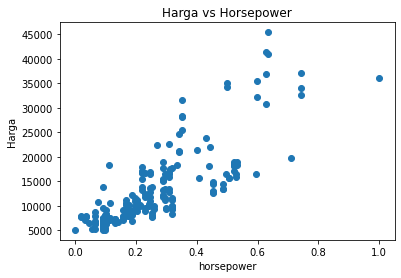

In [ ]:
%matplotlib inline

np.corrcoef(data['Harga'], data['horsepower'])
plt.scatter(data['horsepower'], data['Harga'])
plt.xlabel("horsepower")
plt.ylabel("Harga")
plt.title("Harga vs Horsepower")

Text(0.5, 1.0, 'Harga vs Panjang-kendaraan')

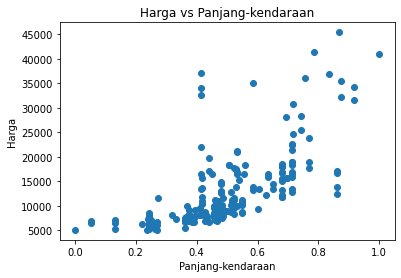

In [ ]:
np.corrcoef(data['Harga'], data['Panjang-kendaraan'])
plt.scatter(data['Panjang-kendaraan'], data['Harga'])
plt.xlabel("Panjang-kendaraan")
plt.ylabel("Harga")
plt.title("Harga vs Panjang-kendaraan")

In [ ]:
def knn_train_test_with_k(train_col, target_col, data, lst_k_values):

    np.random.seed(41)
        
    shuffled_index = np.random.permutation(data.index)
    rand_data = data.reindex(shuffled_index)

    last_train_row = int(len(rand_data) / 2)
    
    train_data = rand_data.iloc[0:last_train_row]
    test_data = rand_data.iloc[last_train_row:]
    
    k_r2 = {}
    
    for k in lst_k_values:
        # Fit model using k nearest neighbors
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_data[[train_col]], train_data[target_col])

        # Make predictions using model with parameter k
        predicted_labels = knn.predict(test_data[[train_col]])

        # Calculate and return r2 score
        r2 = r2_score(test_data[target_col], predicted_labels)
        
        k_r2[k] = r2
        
    return k_r2

In [ ]:
k_r2_results = {}

train_cols = data.columns.drop('Harga')
for col in train_cols:
    r2_val = knn_train_test_with_k(col, 'Harga', data, lst_k_values=[1,3,5,7,9,11,13,15,20])
    k_r2_results[col] = r2_val

k_r2_results

{'Kapasitas': {1: 0.4344317601261617,
  3: 0.5541364995438716,
  5: 0.6276543235169999,
  7: 0.6458119033491309,
  9: 0.6374280311872131,
  11: 0.618411233439343,
  13: 0.6100309915211192,
  15: 0.5879079639235119,
  20: 0.5802663501280053},
 'Kerugian': {1: -0.20347877150311544,
  3: 0.17182725146471145,
  5: 0.18153843512468892,
  7: 0.10083702893110358,
  9: 0.182362509395823,
  11: 0.18031169148017767,
  13: 0.16974371713072933,
  15: 0.1341773639203342,
  20: 0.0667826878105201},
 'Lebar-kendaraan': {1: 0.7138978548128321,
  3: 0.5917872893952195,
  5: 0.5422211099152492,
  7: 0.5087479104832227,
  9: 0.49400488832784184,
  11: 0.49544659225107635,
  13: 0.4748648828312273,
  15: 0.46589314269340854,
  20: 0.4181362493867924},
 'Panjang-kendaraan': {1: 0.44811624375935755,
  3: 0.47755642151821065,
  5: 0.5008398379078013,
  7: 0.4494274006708693,
  9: 0.4158077529868751,
  11: 0.3978756122950492,
  13: 0.3999642309399496,
  15: 0.3873973361782471,
  20: 0.3741386387457387},
 'Rat

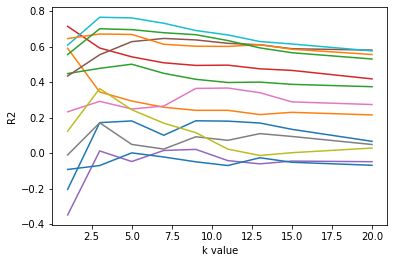

In [ ]:
for k,v in k_r2_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('R2')

pemodelan menggunakan dasar harga kendaraan tersebut berdasarkan beberapa fitur

In [ ]:
# Hitung RMSE rata-rata di berbagai nilai `k` untuk setiap fitur.
feature_avg_r2 = {}
for k,v in k_r2_results.items():
    avg_r2 = np.mean(list(v.values()))
    feature_avg_r2[k] = avg_r2
    
series_avg_r2 = pd.Series(feature_avg_r2)
series_avg_r2.sort_values(ascending=False)

horsepower                             0.671174
Rata-rata-kecepatan-pada-jalan-raya    0.624199
Rata-rata-kecepatan-pada-kota          0.616847
Kapasitas                              0.588453
Lebar-kendaraan                        0.522778
Panjang-kendaraan                      0.427903
bore                                   0.296960
jenis-roda                             0.292423
tingkat-kompresi                       0.117516
Kerugian                               0.109345
stroke-mesin                           0.072400
kecepatan-putaran-mesin               -0.049359
Tinggi-kendaraan                      -0.059951
dtype: float64

In [ ]:
def knn_train_test_several_cols(train_cols, target_col, data, lst_k_values):
    
    np.random.seed(41)
    
    shuffled_index = np.random.permutation(data.index)
    rand_data = data.reindex(shuffled_index)

    last_train_row = int(len(rand_data) / 2)
    
    train_data = rand_data.iloc[0:last_train_row]
    test_data = rand_data.iloc[last_train_row:]
    
    k_r2 = {}
    
    for k in lst_k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_data[train_cols], train_data[target_col])

        predictions = knn.predict(test_data[train_cols])

        r2 = r2_score(test_data[target_col], predictions)       
        k_r2[k] = r2
        
    return k_r2

In [ ]:
k_r2_results = {}

fitur_kedua_terbaik = ['horsepower', 'Rata-rata-kecepatan-pada-jalan-raya']
r2 = knn_train_test_several_cols(fitur_kedua_terbaik, 'Harga', data, lst_k_values=[5])
k_r2_results["fitur kedua terbaik"] = r2

fitur_ketiga_terbaik = ['horsepower', 'Rata-rata-kecepatan-pada-jalan-raya', 'Rata-rata-kecepatan-pada-kota']
r2 = knn_train_test_several_cols(fitur_ketiga_terbaik, 'Harga',data, lst_k_values=[5])
k_r2_results["fitur ketiga terbaik"] = r2

fitur_keempat_terbaik = ['horsepower', 'Rata-rata-kecepatan-pada-jalan-raya', 'Rata-rata-kecepatan-pada-kota', 'Kapasitas']
r2 = knn_train_test_several_cols(fitur_keempat_terbaik, 'Harga',data, lst_k_values=[5])
k_r2_results["fitur keempat terbaik"] = r2

fitur_kelima_terbaik = ['horsepower', 'Rata-rata-kecepatan-pada-jalan-raya', 'Rata-rata-kecepatan-pada-kota', 'Kapasitas', 'Lebar-kendaraan']
r2 = knn_train_test_several_cols(fitur_kelima_terbaik, 'Harga',data, lst_k_values=[5])
k_r2_results["fitur kelima terbaik"] = r2

fitur_keenam_terbaik = ['horsepower', 'Rata-rata-kecepatan-pada-jalan-raya', 'Rata-rata-kecepatan-pada-kota', 'Kapasitas', 'Lebar-kendaraan', 'Panjang-kendaraan']
r2 = knn_train_test_several_cols(fitur_keenam_terbaik, 'Harga', data, lst_k_values=[5])
k_r2_results["fitur keenam terbaik"] = r2

k_r2_results

{'fitur kedua terbaik': {5: 0.8241113481668854},
 'fitur keempat terbaik': {5: 0.723983603546128},
 'fitur keenam terbaik': {5: 0.6641560224765133},
 'fitur kelima terbaik': {5: 0.7441649498484615},
 'fitur ketiga terbaik': {5: 0.7950901234215013}}

Analisis ini menyarankan bahwa kita hanya perlu mempertimbangkan dua fitur terbaik tetapi mari kita juga mempertimbangkan nilai-k yang berbeda:

In [ ]:
k_r2_results = {}

fitur_kedua_terbaik = ['horsepower', 'Rata-rata-kecepatan-pada-jalan-raya']
r2 = knn_train_test_several_cols(fitur_kedua_terbaik, 'Harga', data, lst_k_values=range(1,25))
k_r2_results["fitur kedua terbaik"] = r2

fitur_ketiga_terbaik = ['horsepower', 'Rata-rata-kecepatan-pada-jalan-raya', 'Rata-rata-kecepatan-pada-kota']
r2 = knn_train_test_several_cols(fitur_ketiga_terbaik, 'Harga', data, lst_k_values=range(1,25))
k_r2_results["fitur ketiga terbaik"] = r2

fitur_keempat_terbaik = ['horsepower', 'Rata-rata-kecepatan-pada-jalan-raya', 'Rata-rata-kecepatan-pada-kota', 'Kapasitas']
r2 = knn_train_test_several_cols(fitur_keempat_terbaik, 'Harga', data, lst_k_values=range(1,25))
k_r2_results["fitur keempat terbaik"] = r2

fitur_kelima_terbaik = ['horsepower', 'Rata-rata-kecepatan-pada-jalan-raya', 'Rata-rata-kecepatan-pada-kota', 'Kapasitas', 'Lebar-kendaraan']
r2 = knn_train_test_several_cols(fitur_kelima_terbaik, 'Harga', data, lst_k_values=range(1,25))
k_r2_results["fitur kelima terbaik"] = r2

fitur_keenam_terbaik = ['horsepower', 'Rata-rata-kecepatan-pada-jalan-raya', 'Rata-rata-kecepatan-pada-kota', 'Kapasitas', 'Lebar-kendaraan', 'Panjang-kendaraan']
r2 = knn_train_test_several_cols(fitur_keenam_terbaik, 'Harga', data, lst_k_values=range(1,25))
k_r2_results["fitur keenam terbaik"] = r2

k_r2_results

{'fitur kedua terbaik': {1: 0.7972490549835201,
  2: 0.8391610724523819,
  3: 0.8489909178962664,
  4: 0.8532159722018143,
  5: 0.8241113481668854,
  6: 0.7943961198698811,
  7: 0.7671789127476027,
  8: 0.7465974895386502,
  9: 0.7289553838860114,
  10: 0.7035422325780416,
  11: 0.6840544560588764,
  12: 0.6698465793386335,
  13: 0.6571572278217311,
  14: 0.6800780033656755,
  15: 0.6657657505066313,
  16: 0.6444345550339012,
  17: 0.6238612210508845,
  18: 0.6206205428756615,
  19: 0.6230872591464176,
  20: 0.6134098003546615,
  21: 0.6148699862901881,
  22: 0.6193907133182002,
  23: 0.6203226275857616,
  24: 0.6193819090912325},
 'fitur keempat terbaik': {1: 0.8047603238518476,
  2: 0.8247656542588517,
  3: 0.7704875276866002,
  4: 0.7523767426289667,
  5: 0.723983603546128,
  6: 0.7048824773066615,
  7: 0.6951452916800063,
  8: 0.6953036962817771,
  9: 0.6800375494598305,
  10: 0.682115511729422,
  11: 0.6806665034649384,
  12: 0.6668683935454598,
  13: 0.6589067989351103,
  14: 0.6

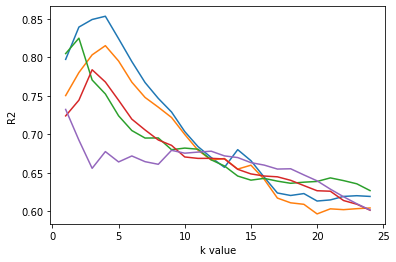

In [ ]:
for k,v in k_r2_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('R2')

dengan menyimpulkan bahwa model terbaik adlaah hanya dengan memperhitungkan dua fitur terbaik dan menggunakan K=4

disimpulkan bahwa horsepower lah yang mempengaruhi harga mobil tersebut (dikarenakan memberikan hasil 85% akurasi)